<a href="https://colab.research.google.com/github/harshita0147/Harshita_Pamu_INFO5731_Fall2024/blob/main/Pamu_Harshita_Assignment_03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [47]:
import csv
from collections import defaultdict, Counter

# Load data from the CSV file
def load_data(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        data = [row[0] for row in reader]
    return data

# Task (1): Count frequency of all trigrams
def count_trigrams(reviews):
    trigram_counts = defaultdict(int)
    for review in reviews:
        words = review.split()
        for i in range(len(words) - 2):
            trigram = (words[i], words[i+1], words[i+2])
            trigram_counts[trigram] += 1
    return trigram_counts

# Task (2): Calculate bigram probabilities
def count_bigrams(reviews):
    bigram_counts = defaultdict(int)
    unigram_counts = defaultdict(int)
    for review in reviews:
        words = review.split()
        for i in range(len(words) - 1):
            bigram = (words[i], words[i+1])
            bigram_counts[bigram] += 1
            unigram_counts[words[i]] += 1
        if words:
            unigram_counts[words[-1]] += 1
    return bigram_counts, unigram_counts

def calculate_bigram_probabilities(bigram_counts, unigram_counts):
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        bigram_probabilities[bigram] = count / unigram_counts[bigram[0]]
    return bigram_probabilities

# Task (3): Extract noun phrases and calculate relative probabilities
def extract_noun_phrases(reviews):
    noun_phrases_counts = defaultdict(int)
    noun_phrases_per_review = []

    for review in reviews:
        words = review.split()
        phrases = []
        for i in range(len(words) - 1):
            if words[i].istitle() and words[i+1].istitle():  # Simple noun phrase detector
                phrase = words[i] + ' ' + words[i+1]
                noun_phrases_counts[phrase] += 1
                phrases.append(phrase)
        noun_phrases_per_review.append(Counter(phrases))

    return noun_phrases_counts, noun_phrases_per_review

def calculate_relative_probabilities(noun_phrases_counts, noun_phrases_per_review):
    max_frequency = max(noun_phrases_counts.values())
    relative_probabilities = []

    for phrases in noun_phrases_per_review:
        row = {phrase: count / max_frequency for phrase, count in phrases.items()}
        relative_probabilities.append(row)

    return relative_probabilities

# Main program
def main(filename):
    # Step 1: Load data
    reviews = load_data(filename)

    # Step 2: Count trigrams
    trigram_counts = count_trigrams(reviews)

    # Step 3: Calculate bigram probabilities
    bigram_counts, unigram_counts = count_bigrams(reviews)
    bigram_probabilities = calculate_bigram_probabilities(bigram_counts, unigram_counts)

    # Step 4: Extract noun phrases and calculate relative probabilities
    noun_phrases_counts, noun_phrases_per_review = extract_noun_phrases(reviews)
    relative_probabilities = calculate_relative_probabilities(noun_phrases_counts, noun_phrases_per_review)

    # Display trigram counts
    print("Trigram Counts (N=3):")
    for trigram, count in trigram_counts.items():
        print(f"{trigram}: {count}")

    # Display bigram probabilities
    print("\nBigram Probabilities:")
    for bigram, prob in bigram_probabilities.items():
        print(f"{bigram}: {prob:.2f}")

    # Display noun phrases relative probabilities table
    print("\nNoun Phrase Relative Probabilities:")
    for i, row in enumerate(relative_probabilities):
        print(f"Review {i + 1}: {row}")

# Run the program with 'imdb_reviews.csv'
main('imdb_reviews.csv')


Streaming output truncated to the last 5000 lines.
('dragging', 'its'): 0.33
('its', 'feet'): 0.02
('feet', 'nowhere'): 1.00
('nowhere', 'because'): 0.50
('because', "it's"): 0.04
("it's", 'badly'): 0.02
('badly', 'written'): 1.00
('written', 'so'): 0.14
('so', 'bad'): 0.01
('bad', 'it'): 0.10
('a', 'snooze,'): 0.00
('snooze,', 'at'): 1.00
('the', 'day'): 0.00
('day', "it's"): 0.14
("it's", 'boring'): 0.02
('and', "we've"): 0.00
("we've", 'lost'): 0.33
('lost', 'interest.'): 0.25
('interest.', 'Characters'): 1.00
('Characters', 'spend'): 0.50
('spend', 'some'): 0.50
('some', 'much'): 0.02
('time', 'talking'): 0.02
('talking', 'philosophizing'): 0.14
('philosophizing', 'whining'): 1.00
('whining', 'and'): 1.00
('and', 'complaining'): 0.00
('complaining', 'you'): 0.50
('you', 'wonder'): 0.01
('wonder', 'why'): 0.20
('why', 'a'): 0.07
('a', 'production'): 0.00
('production', 'would'): 0.14
('would', 'spend'): 0.02
('spend', 'millions'): 0.50
('millions', 'on'): 0.50
('a', 'badly'): 0.00
(

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [48]:
import math
from collections import defaultdict, Counter

# Load data from the CSV file
def load_data(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        return [line.strip() for line in lines]

# (1) Build TF-IDF Matrix
def calculate_tf(doc):
    tf = Counter(doc.split())
    total_terms = len(doc.split())
    return {term: count / total_terms for term, count in tf.items()}

def calculate_idf(docs):
    N = len(docs)
    idf = defaultdict(lambda: 0)
    for doc in docs:
        terms = set(doc.split())
        for term in terms:
            idf[term] += 1
    return {term: math.log(N / count) for term, count in idf.items()}

def calculate_tf_idf(docs):
    idf = calculate_idf(docs)
    tf_idf_matrix = []
    for doc in docs:
        tf = calculate_tf(doc)
        tf_idf = {term: tf_val * idf[term] for term, tf_val in tf.items()}
        tf_idf_matrix.append(tf_idf)
    return tf_idf_matrix

# (2) Rank documents using cosine similarity
def cosine_similarity(doc_vector, query_vector):
    dot_product = sum(doc_vector.get(term, 0) * query_vector.get(term, 0) for term in query_vector)
    doc_magnitude = math.sqrt(sum(val**2 for val in doc_vector.values()))
    query_magnitude = math.sqrt(sum(val**2 for val in query_vector.values()))
    if doc_magnitude == 0 or query_magnitude == 0:
        return 0.0
    return dot_product / (doc_magnitude * query_magnitude)

def rank_documents(docs, tf_idf_matrix, query):
    # Calculate TF-IDF for query
    query_tf = calculate_tf(query)
    idf = calculate_idf(docs)  # Reusing IDF values from documents
    query_tf_idf = {term: query_tf.get(term, 0) * idf.get(term, 0) for term in query_tf}

    # Compute cosine similarity for each document
    similarities = []
    for i, doc_vector in enumerate(tf_idf_matrix):
        sim = cosine_similarity(doc_vector, query_tf_idf)
        similarities.append((i, sim))

    # Sort documents by similarity
    sorted_docs = sorted(similarities, key=lambda x: x[1], reverse=True)
    return sorted_docs

# Main program
def main(filename, query):
    # Load documents
    docs = load_data(filename)

    # Calculate TF-IDF matrix
    tf_idf_matrix = calculate_tf_idf(docs)

    # Rank documents by cosine similarity to the query
    ranked_docs = rank_documents(docs, tf_idf_matrix, query)

    # Display ranked documents
    print("Ranking of documents with respect to query:")
    for doc_index, similarity in ranked_docs:
        print(f"Document {doc_index + 1} (Similarity: {similarity:.4f}): {docs[doc_index]}")

# Run the program with 'imdb_reviews.csv' and an example query
query = "An outstanding movie with a haunting performance and best character development"
main('imdb_reviews.csv', query)


Ranking of documents with respect to query:
Document 16 (Similarity: 0.1220): An A list of actors like Florence Pugh, Christopher Walken and Léa Seydoux, all of them could've been amazing characters but get zero chance of showing that.An entire plot with Paul's sister goes out the drain as well... messing with time started to become promising but it leads nowhere... I mean I could go on, in short the movie had many plot gaps, didn't develop the characters properly, poorly introduced the newcomers and relied heavily on its outstanding cinematography and sound.It's a shame because I can't tell you how excited I was to write a praising review, but this was my honest opinion which apparently doesn't seem to align with the majority.A lot of scenes drag without much substance to it, the highlight of the film was Javier Barden's character and the messages behind the dangerous of the concept of a Messia.I am of course hopeful for the third movie, maybe with my expectations now lowered it becom

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

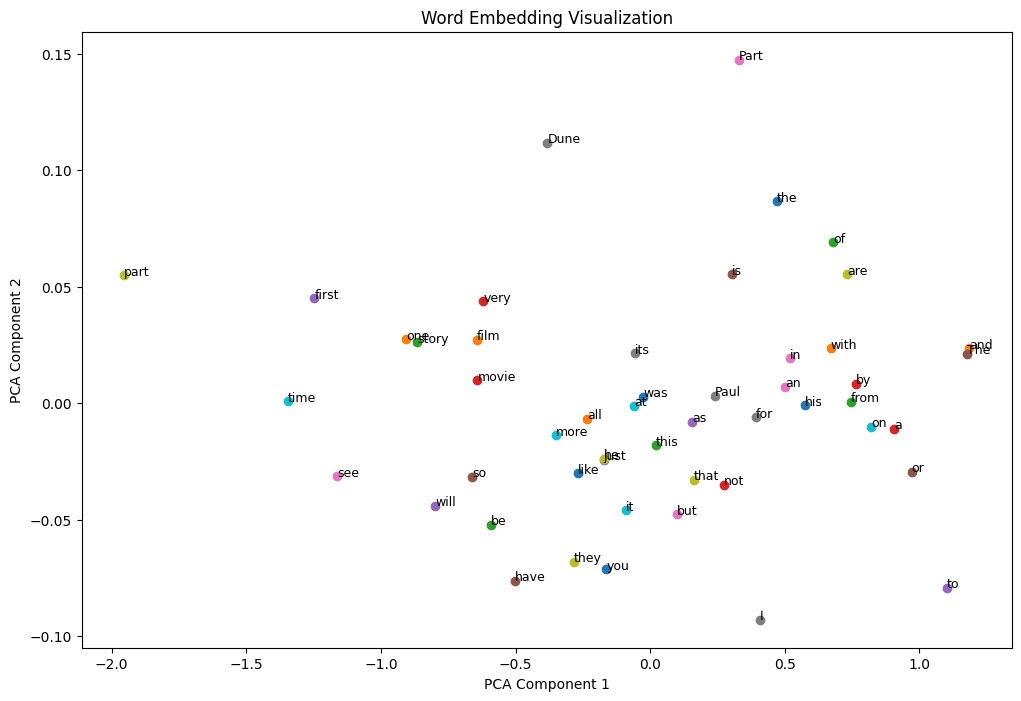

In [49]:
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import csv

# Load and preprocess data
def load_data(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header if there is one
        data = [row[0].split() for row in reader]  # Split each line into a list of words
    return data

# Train Word2Vec model
def train_word2vec(data, vector_size=300, window=5, min_count=1, epochs=10):
    model = Word2Vec(sentences=data, vector_size=vector_size, window=window, min_count=min_count, workers=4)
    model.train(data, total_examples=model.corpus_count, epochs=epochs)
    return model

# Visualize Word Embeddings
def visualize_embeddings(model, words_to_display=50):
    words = list(model.wv.index_to_key[:words_to_display])
    embeddings = [model.wv[word] for word in words]

    # Reduce dimensions to 2D using PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Plot
    plt.figure(figsize=(12, 8))
    for i, word in enumerate(words):
        x, y = reduced_embeddings[i]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), fontsize=9)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("Word Embedding Visualization")
    plt.show()

# Main function to execute the steps
def main(filename):
    # Step 1: Load and preprocess data
    data = load_data(filename)

    # Step 2: Train the Word2Vec model
    word2vec_model = train_word2vec(data)

    # Step 3: Visualize the embeddings
    visualize_embeddings(word2vec_model)

# Run the main function with your dataset
main('imdb_reviews.csv')


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/harshita0147/Harshita_Pamu_INFO5731_Fall2024/blob/de38c9469eeb7f0346f68cdc7bf4fb3bff274cde/AVATAR.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
This assignment offered a valuable experience in building a word embedding model from scratch and conducting TF-IDF and N-gram analyses without pre-existing libraries. The main challenge was coding complex text processing and similarity calculations from scratch, which required deep understanding. However, exploring embeddings and visualizations was highly rewarding. The timeframe felt tight, as these tasks required significant time for both conceptual work and coding, making it challenging to fully explore each aspect.